In [66]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,123):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],0)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(4305, 100, 100)

In [68]:
Xtest.shape

(246, 100, 100)

In [69]:
ytrain.shape

(4305,)

In [70]:
ytest.shape

(246,)

[]

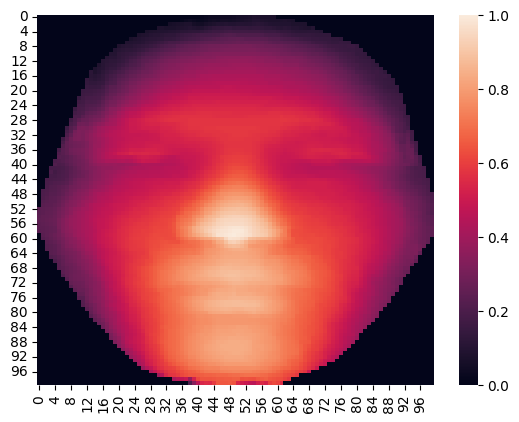

In [71]:
sns.heatmap(data=Xtrain[4304])
plt.plot()

In [72]:
ytrain[4304]

122

[]

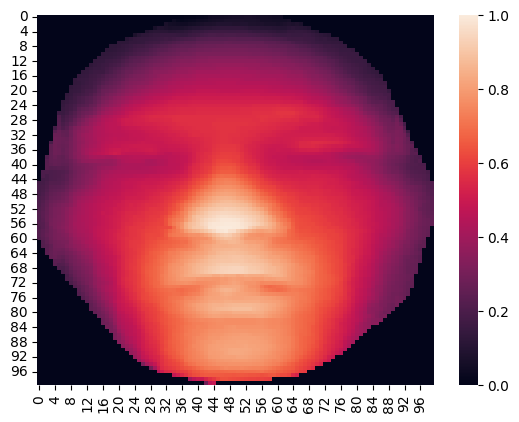

In [73]:
sns.heatmap(data=Xtest[245])
plt.plot()

In [74]:
ytest[245]

122

In [75]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D

In [78]:
#Sequential model
model=Sequential()

#Layer 1: Input layer
model.add(Input(shape=(100,100,1)))

#Layer 2: Covolution layer 1
model.add(Conv2D(40,(5,5),activation='relu',padding='same'))
#Layer 3: Pooling Layer 1
model.add(MaxPooling2D(4,4))

#Layer 4: Covolution layer 2
model.add(Conv2D(20,(3,3),activation='relu',padding='same'))
#Layer 5: Pooling Layer 2
model.add(MaxPooling2D(2,2))

#Layer 6: Flatten Layer
model.add(Flatten())

#Layer 7: Fully Connected layer
model.add(Dense(200,activation='relu'))

#Layer 8: Output layer(multiclass)
model.add(Dense(123,activation='softmax'))

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 40)      1040      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 40)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 20)        7220      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 20)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2880)              0         
                                                                 
 dense_6 (Dense)             (None, 200)              

In [79]:
model.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
135/135 [==============================] - 39s 274ms/step - loss: 4.6769 - accuracy: 0.0339
Epoch 2/10
135/135 [==============================] - 38s 283ms/step - loss: 3.7377 - accuracy: 0.1724
Epoch 3/10
135/135 [==============================] - 38s 285ms/step - loss: 2.5583 - accuracy: 0.4181
Epoch 4/10
135/135 [==============================] - 43s 317ms/step - loss: 1.7398 - accuracy: 0.5851
Epoch 5/10
135/135 [==============================] - 46s 336ms/step - loss: 1.2066 - accuracy: 0.6938
Epoch 6/10
135/135 [==============================] - 37s 274ms/step - loss: 0.8480 - accuracy: 0.7803
Epoch 7/10
135/135 [==============================] - 37s 272ms/step - loss: 0.6190 - accuracy: 0.8318
Epoch 8/10
135/135 [==============================] - 37s 273ms/step - loss: 0.4643 - accuracy: 0.8732
Epoch 9/10
135/135 [==============================] - 38s 278ms/step - loss: 0.3011 - accuracy: 0.9199
Epoch 10/10
135/135 [==============================] - 38s 282ms/step - l

In [80]:
yprob=model.predict(Xtest)

8/8 [==============================] - 1s 96ms/step


In [81]:
yprob.shape

(246, 123)

In [86]:
ypred=yprob.argmax(axis=1)
ypred.shape

(246,)

In [87]:
ypred

array([  0,  70,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
         6,   7,   7,   8,   8,   9,   9,  10,  10,  11,   6,  12,  12,
        13,  13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,
        19,  20,  20,  21,  21, 106,  80,  23,  23,  24,  24,  25,  83,
        26,  26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,
        59,  33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,
        39,  39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,
        45,  46,  46,  35,  47,  51,  48,  49,  34,  50,  50,  51,  51,
        52,  52,  53,  53,  54,  54,  55,  55,  56,  87,  57,  57,  58,
        41,  59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,  64,
        65,  16,  66,  66,  67,  67,  68,  68,  69,  69,   1,  70,  71,
        71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,
        78,  78,  79, 101,  80,  80,  81,  81,  82,   2,  83,  83,  84,
        84,  85,  85,  86,  86,  87,  67,  88,  88,  89,  89,  9

In [90]:
ytest

array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
         6,   7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,
        13,  13,  14,  14,  15,  15,  16,  16,  17,  17,  18,  18,  19,
        19,  20,  20,  21,  21,  22,  22,  23,  23,  24,  24,  25,  25,
        26,  26,  27,  27,  28,  28,  29,  29,  30,  30,  31,  31,  32,
        32,  33,  33,  34,  34,  35,  35,  36,  36,  37,  37,  38,  38,
        39,  39,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,  45,
        45,  46,  46,  47,  47,  48,  48,  49,  49,  50,  50,  51,  51,
        52,  52,  53,  53,  54,  54,  55,  55,  56,  56,  57,  57,  58,
        58,  59,  59,  60,  60,  61,  61,  62,  62,  63,  63,  64,  64,
        65,  65,  66,  66,  67,  67,  68,  68,  69,  69,  70,  70,  71,
        71,  72,  72,  73,  73,  74,  74,  75,  75,  76,  76,  77,  77,
        78,  78,  79,  79,  80,  80,  81,  81,  82,  82,  83,  83,  84,
        84,  85,  85,  86,  86,  87,  87,  88,  88,  89,  89,  9

In [91]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
          17       1.00    

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

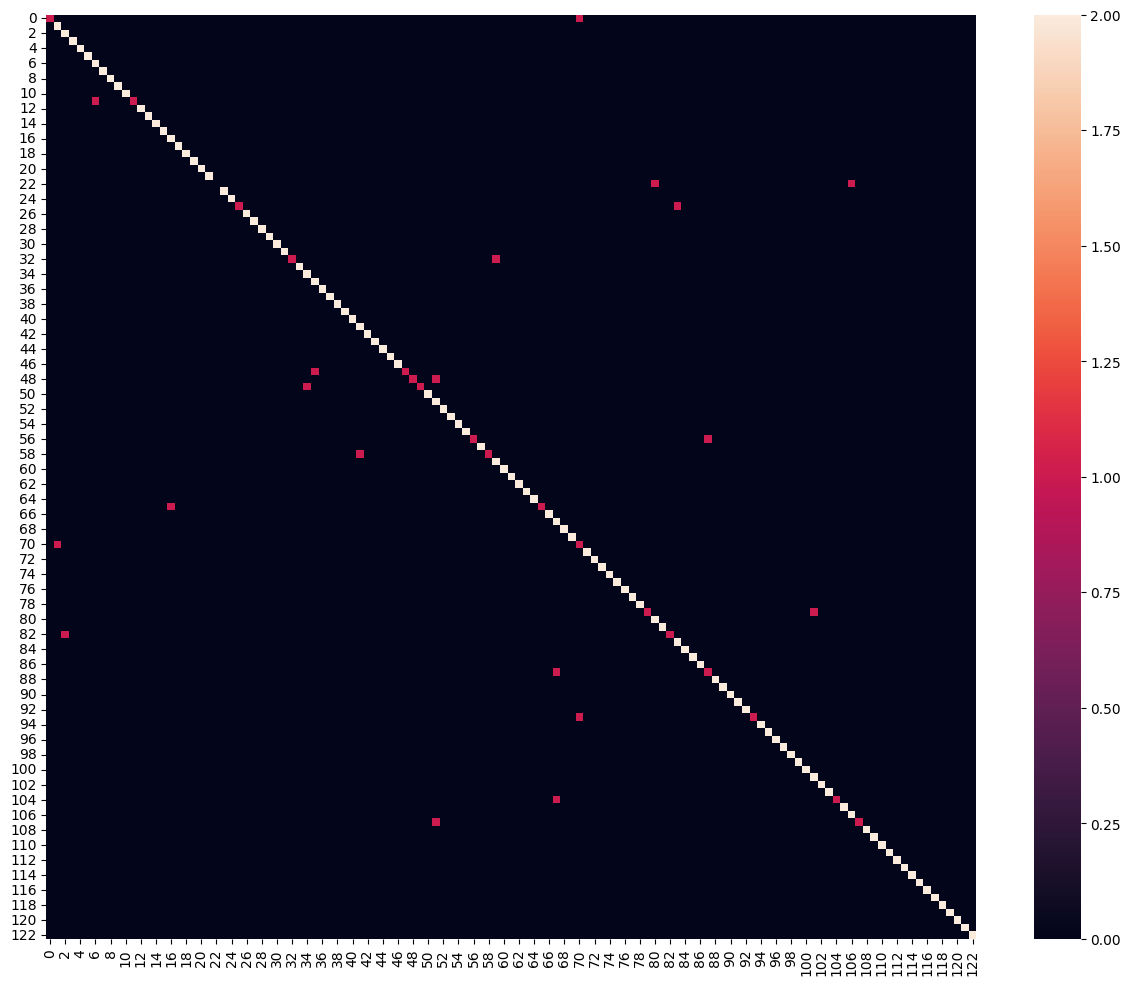

In [97]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()